In [86]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers = ["ABB.ST", "SAAB-B.ST", "VOLV-B.ST", "ATCO-A.ST",
           "NCC-B.ST", "JM.ST", "SKA-B.ST",
           "SEB-A.ST", "NDA-SE.ST", "SHB-A.ST"]

# Download stock data
stock_data = yf.download(tickers, period="1mo", interval="1d")

# Print the first few rows to inspect structure
print(stock_data.head())


[*********************100%***********************]  10 of 10 completed

Price            Close                                                  \
Ticker          ABB.ST   ATCO-A.ST       JM.ST    NCC-B.ST   NDA-SE.ST   
Date                                                                     
2025-01-20  617.000000  185.800003  170.199997  162.100006  128.800003   
2025-01-21  626.000000  186.149994  172.100006  166.000000  130.750000   
2025-01-22  650.200012  188.800003  172.399994  176.300003  130.649994   
2025-01-23  649.400024  189.649994  174.500000  177.800003  133.050003   
2025-01-24  650.599976  192.399994  175.699997  180.000000  132.850006   

Price                                                                   ...  \
Ticker       SAAB-B.ST    SEB-A.ST    SHB-A.ST    SKA-B.ST   VOLV-B.ST  ...   
Date                                                                    ...   
2025-01-20  222.500000  160.449997  120.550003  233.699997  288.100006  ...   
2025-01-21  229.600006  162.500000  122.099998  238.699997  289.100006  ...   
2025-01-22  

In [87]:
stock_data = stock_data.tail(20)# Calculate daily percentage returns
returns = stock_data.pct_change().dropna()
print(returns)
stock_data = returns


Price          Close                                                    \
Ticker        ABB.ST ATCO-A.ST     JM.ST  NCC-B.ST NDA-SE.ST SAAB-B.ST   
Date                                                                     
2025-01-24  0.001848  0.014500  0.006877  0.012373 -0.001503 -0.004047   
2025-01-27 -0.048571 -0.028586  0.012521 -0.003889  0.004140 -0.004491   
2025-01-28 -0.016801 -0.034778 -0.008994  0.000000 -0.002249 -0.004941   
2025-01-29  0.016760  0.009146  0.019285 -0.001673 -0.003005  0.005613   
2025-01-30 -0.019716  0.010711  0.021146  0.007263  0.010173  0.007299   
2025-01-31  0.000989  0.011957 -0.101907 -0.006101 -0.016412  0.024936   
2025-02-03 -0.017457 -0.017186 -0.026699 -0.002790 -0.013273  0.011853   
2025-02-04  0.001006  0.012022  0.029925  0.003917 -0.011914 -0.023222   
2025-02-05 -0.009712 -0.002160 -0.000605 -0.002230 -0.006612  0.002735   
2025-02-06  0.007778  0.008929  0.006057  0.027374  0.025450 -0.045321   
2025-02-07  0.001678 -0.015017 -0.0228

In [88]:
print(stock_data.columns)

MultiIndex([( 'Close',    'ABB.ST'),
            ( 'Close', 'ATCO-A.ST'),
            ( 'Close',     'JM.ST'),
            ( 'Close',  'NCC-B.ST'),
            ( 'Close', 'NDA-SE.ST'),
            ( 'Close', 'SAAB-B.ST'),
            ( 'Close',  'SEB-A.ST'),
            ( 'Close',  'SHB-A.ST'),
            ( 'Close',  'SKA-B.ST'),
            ( 'Close', 'VOLV-B.ST'),
            (  'High',    'ABB.ST'),
            (  'High', 'ATCO-A.ST'),
            (  'High',     'JM.ST'),
            (  'High',  'NCC-B.ST'),
            (  'High', 'NDA-SE.ST'),
            (  'High', 'SAAB-B.ST'),
            (  'High',  'SEB-A.ST'),
            (  'High',  'SHB-A.ST'),
            (  'High',  'SKA-B.ST'),
            (  'High', 'VOLV-B.ST'),
            (   'Low',    'ABB.ST'),
            (   'Low', 'ATCO-A.ST'),
            (   'Low',     'JM.ST'),
            (   'Low',  'NCC-B.ST'),
            (   'Low', 'NDA-SE.ST'),
            (   'Low', 'SAAB-B.ST'),
            (   'Low',  'SEB-A.ST'),
 

In [89]:
stock_data = stock_data['Close']

In [90]:
with open("stock_returns.txt", "w") as f:
    f.write("Date\t" + "\t".join(stock_data.columns) + "\n")
    
    for date, row in zip(stock_data.index, stock_data.values):
        f.write(f"{date}\t" + "\t".join(map(lambda x: f"{x:.2f}", row)) + "\n")

In [91]:
stock_data.to_csv('stock_returns.csv', index=False)

In [114]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, rotation='varimax')
factors = fa.fit_transform(stock_data)

factor_loadings = pd.DataFrame(fa.components_, columns=stock_data.columns)
print("Factor Loadings (Varimax Rotation):")
factor_loadings.to_csv('factor_loadings.csv', index=False)
factor_loadings


Factor Loadings (Varimax Rotation):


Ticker,ABB.ST,ATCO-A.ST,JM.ST,NCC-B.ST,NDA-SE.ST,SAAB-B.ST,SEB-A.ST,SHB-A.ST,SKA-B.ST,VOLV-B.ST
0,0.008753,0.008252,0.016029,0.004942,0.004250,0.002163,-0.003374,0.003126,0.006923,0.020370
1,0.003742,0.004215,0.006195,0.007883,0.008227,0.003814,0.013177,0.003376,0.001506,-0.002487


In [115]:
max_values = factor_loadings.iloc[:, :].max() 
max_rows = factor_loadings.iloc[:, :].idxmax()

for col, val, idx in zip(factor_loadings.columns[:], max_values, max_rows):
    print(f"Column {col}: Max Value = {val:.2f}, Row = {idx}")

Column ABB.ST: Max Value = 0.01, Row = 0
Column ATCO-A.ST: Max Value = 0.01, Row = 0
Column JM.ST: Max Value = 0.02, Row = 0
Column NCC-B.ST: Max Value = 0.01, Row = 1
Column NDA-SE.ST: Max Value = 0.01, Row = 1
Column SAAB-B.ST: Max Value = 0.00, Row = 1
Column SEB-A.ST: Max Value = 0.01, Row = 1
Column SHB-A.ST: Max Value = 0.00, Row = 1
Column SKA-B.ST: Max Value = 0.01, Row = 0
Column VOLV-B.ST: Max Value = 0.02, Row = 0


In [116]:
factor_loadings.to_csv('factor_loadings.csv', index=False)

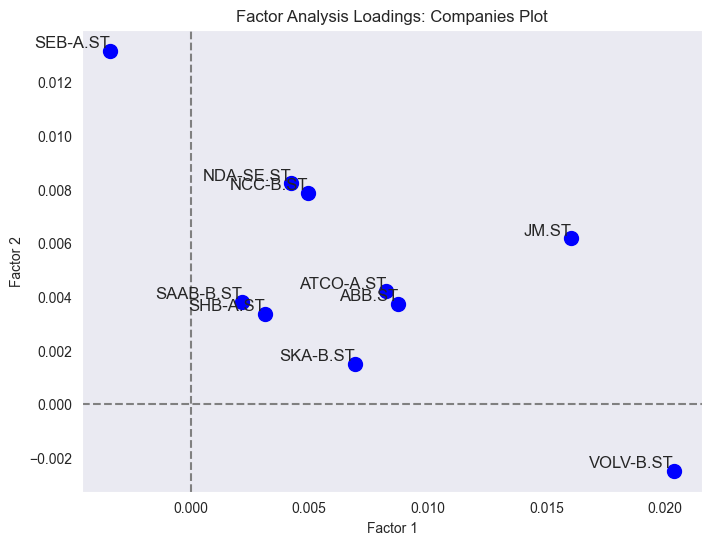

In [117]:
import matplotlib.pyplot as plt

# Extract Factor 1 and Factor 2 from factor_loadings DataFrame
factor_1 = factor_loadings.iloc[0]  # First row (Factor 1)
factor_2 = factor_loadings.iloc[1]  # Second row (Factor 2)

# Plot factor loadings
plt.figure(figsize=(8, 6))
plt.scatter(factor_1, factor_2, color='b', s=100)

# Add company labels
for company, x, y in zip(factor_loadings.columns, factor_1, factor_2):
    plt.text(x, y, company, fontsize=12, ha='right', va='bottom')

# Formatting
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Factor Analysis Loadings: Companies Plot")
plt.grid()
plt.show()


In [62]:
fa = FactorAnalysis(n_components=3, rotation=None)
factors = fa.fit_transform(stock_data)

# Print Factor Loadings
factor_loadings = pd.DataFrame(fa.components_, columns=stock_data.columns)
print("Factor Loadings (Without Rotation):")
factor_loadings

Factor Loadings (Without Rotation):


Ticker,ABB.ST,ATCO-A.ST,JM.ST,NCC-B.ST,NDA-SE.ST,SAAB-B.ST,SEB-A.ST,SHB-A.ST,SKA-B.ST,VOLV-B.ST
0,6.489868,0.971765,-2.249098,3.402332,1.512033,21.863585,2.577920,2.105815,2.245757,7.410940
1,14.476748,1.571000,4.207834,-1.403370,0.679024,-2.307538,1.699312,-0.445550,-0.644893,-6.373004
2,0.531424,0.898125,-2.646778,4.618567,0.881636,-2.248307,2.367959,2.430699,9.522234,7.468842


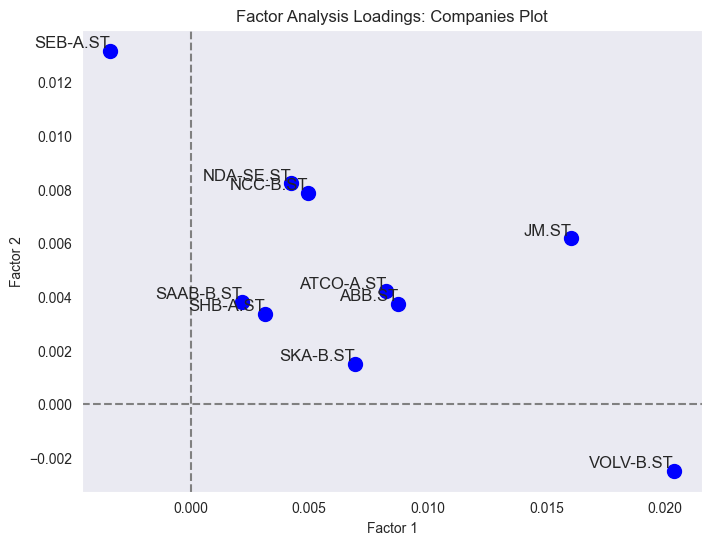

In [118]:
# Extract Factor 1 and Factor 2 from factor_loadings DataFrame
factor_1 = factor_loadings.iloc[0]  # First row (Factor 1)
factor_2 = factor_loadings.iloc[1]  # Second row (Factor 2)

# Plot factor loadings
plt.figure(figsize=(8, 6))
plt.scatter(factor_1, factor_2, color='b', s=100)

# Add company labels
for company, x, y in zip(factor_loadings.columns, factor_1, factor_2):
    plt.text(x, y, company, fontsize=12, ha='right', va='bottom')

# Formatting
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Factor Analysis Loadings: Companies Plot")
plt.grid()
plt.show()

In [63]:
fa = FactorAnalysis(n_components=2, rotation='quartimax')
factors = fa.fit_transform(stock_data)

# Print Factor Loadings
factor_loadings = pd.DataFrame(fa.components_, columns=stock_data.columns)
print("Factor Loadings (Varimax Rotation):")
factor_loadings

Factor Loadings (Varimax Rotation):


Ticker,ABB.ST,ATCO-A.ST,JM.ST,NCC-B.ST,NDA-SE.ST,SAAB-B.ST,SEB-A.ST,SHB-A.ST,SKA-B.ST,VOLV-B.ST
0,3.927429,0.587165,-2.571490,3.005958,1.263843,22.056520,1.962431,1.842816,1.160418,7.400366
1,15.373130,1.795255,3.477146,-0.339036,1.014216,1.352690,2.342386,0.163905,0.669295,-4.235195
2,-0.468205,0.807028,-3.326656,5.072055,0.947981,0.275862,2.408870,2.668039,9.712761,8.866708


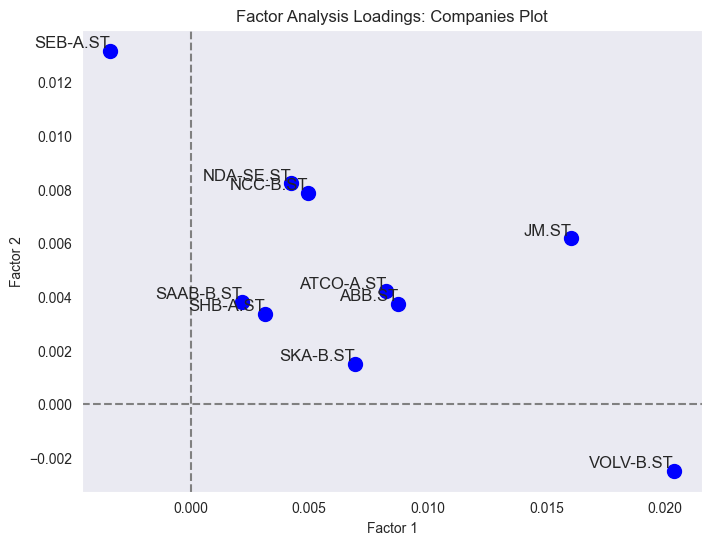

In [119]:
# Extract Factor 1 and Factor 2 from factor_loadings DataFrame
factor_1 = factor_loadings.iloc[0]  # First row (Factor 1)
factor_2 = factor_loadings.iloc[1]  # Second row (Factor 2)

# Plot factor loadings
plt.figure(figsize=(8, 6))
plt.scatter(factor_1, factor_2, color='b', s=100)

# Add company labels
for company, x, y in zip(factor_loadings.columns, factor_1, factor_2):
    plt.text(x, y, company, fontsize=12, ha='right', va='bottom')

# Formatting
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Factor Analysis Loadings: Companies Plot")
plt.grid()
plt.show()